# Handwritten Digit Recognition using K-Nearest Neighbors

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

## Load the dataset

In [2]:
mnist = tf.keras.datasets.mnist
(X, y), (_, _) = mnist.load_data()

In [3]:
X = X.reshape(X.shape[0], -1) / 255.0

## Splitting the dataset

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
print(X_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
print(y_train)

[7 4 5 ... 7 1 4]


In [8]:
print(y_test)

[3 6 6 ... 5 1 6]


## Feature Scaling

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
print(X_train_scaled)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
print(X_test_scaled)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Training the K-Nearest Neighbors model

In [12]:
classifier = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

## Predict using the model

In [13]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[3 3]
 [6 6]
 [6 6]
 ...
 [5 5]
 [1 1]
 [6 6]]


## Calculate the Confusion Matrix and Accuracy Score

In [14]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [15]:
print(cm)
print(accuracy)

[[1045    2   15   38    8   51    0    4   38    4]
 [   1 1357    1    1    0    1    0    0   18    0]
 [  34   40  707   57   37    3    2   44  226   16]
 [   5   12    0 1060    4   27    0    6   86    8]
 [   5    5    2    1  959    2    1    1    9  168]
 [  19   26    2   56   29  698    3    0  197   45]
 [  97   22    9    8   73   23  873    3   72   10]
 [  17   12    5   18   39   12    0  649   65  411]
 [   3   10    0   16    4    3    2    1 1137   15]
 [   6    6    4   13   15    3    0   18   54 1086]]
0.7975833333333333


## Create DataFrame of Actual and Predicted Values

In [16]:
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

## Save DataFrame to CSV File

In [17]:
df.to_csv("predictions.csv", index=False)

## Visualizing the Training and Test sets results

In [18]:
def plot_images(images, labels_true, labels_pred, title):
    fig, axes = plt.subplots(3, 3, figsize = (10, 10))
    fig.suptitle(title, fontsize = 16)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(28, 28), cmap = "binary")
        ax.set_xticks([])
        ax.set_yticks([])
        xlabel = f"True: {labels_true[i]}\nPredicted: {labels_pred[i]}"
        ax.set_xlabel(xlabel, fontsize = 10)
    plt.show()

## Visualizing the Training set results

In [19]:
random_indices_train = np.random.choice(range(len(X_train)), size = 9, replace = False)
images_train = X_train[random_indices_train]
true_labels_train = y_train[random_indices_train]
predicted_labels_train = classifier.predict(scaler.transform(images_train))

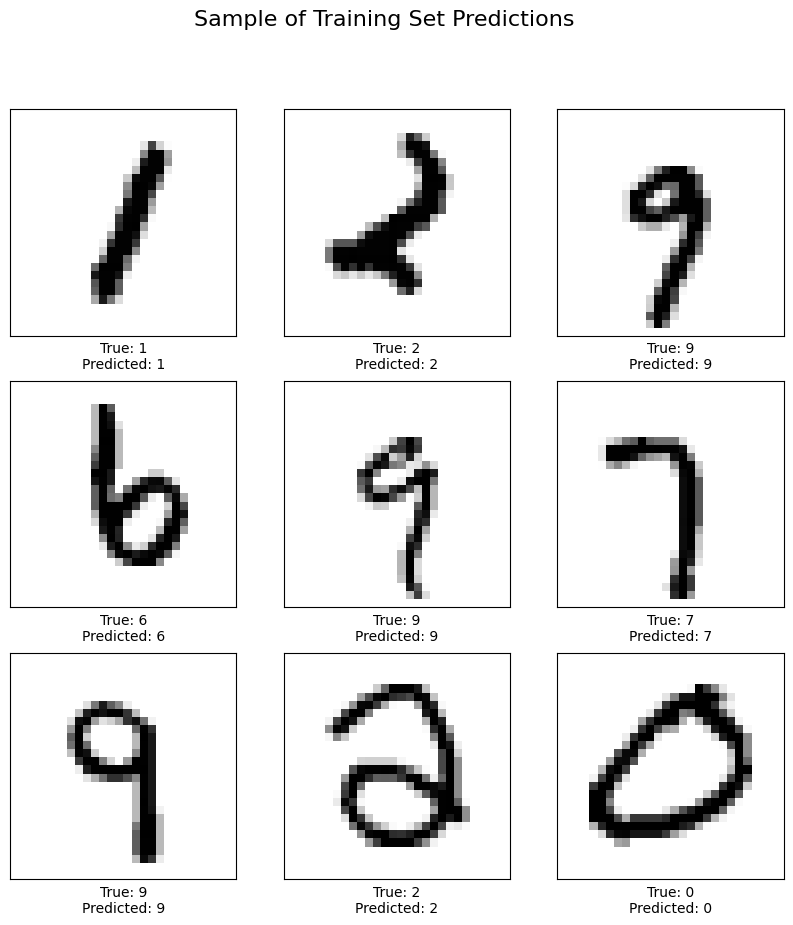

In [20]:
plot_images(images_train, true_labels_train, predicted_labels_train, "Sample of Training Set Predictions")

## Visualizing the Test set results

In [21]:
random_indices = np.random.choice(range(len(X_test)), size = 9, replace = False)
images = X_test[random_indices]
true_labels = y_test[random_indices]
predicted_labels = y_pred[random_indices]

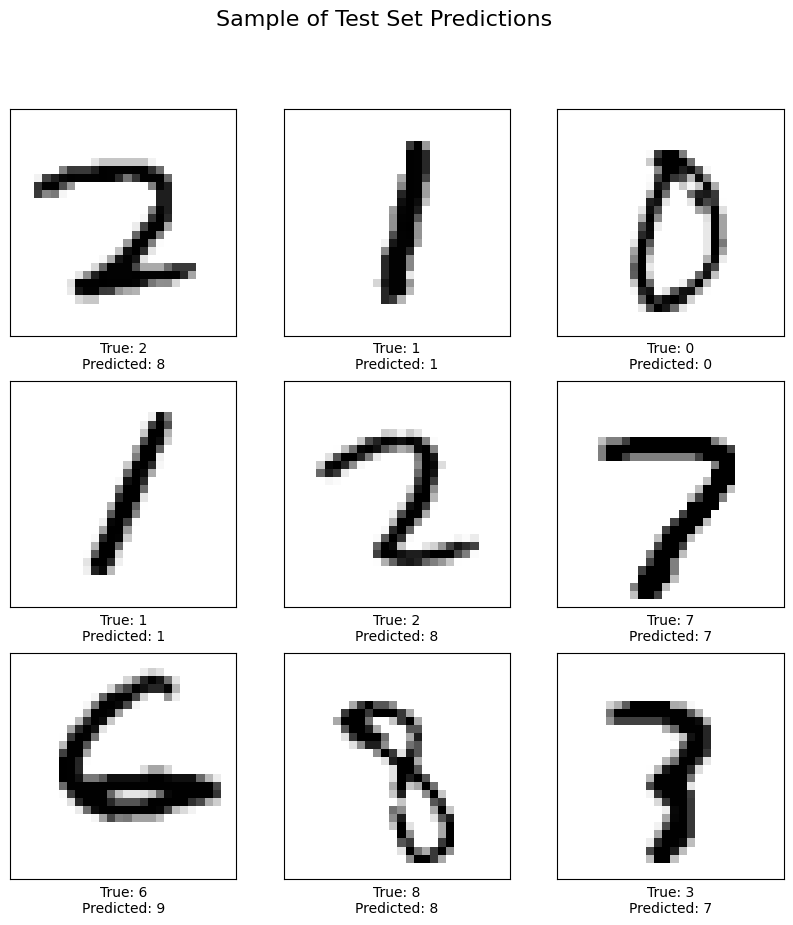

In [22]:
plot_images(images, true_labels, predicted_labels, "Sample of Test Set Predictions")

<hr>